<a href="https://colab.research.google.com/github/asrafhida/Submission-AnalisisDataDicoding/blob/master/Komlan_Kel6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import seaborn as sns
import keras
import tensorflow as tf
from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
import itertools

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
x_train_arab = pd.read_csv("/content/drive/MyDrive/csvTrainImages 60k x 784.csv").values
y_train_arab = pd.read_csv("/content/drive/MyDrive/csvTrainLabel 60k x 1.csv").values
x_test_arab = pd.read_csv("/content/drive/MyDrive/csvTestImages 10k x 784.csv").values
y_test_arab = pd.read_csv("/content/drive/MyDrive/csvTestLabel 10k x 1.csv").values

x_train_arab = x_train_arab.reshape(x_train_arab.shape[0], 28, 28, 1).astype('float32') / 255
x_test_arab = x_test_arab.reshape(x_test_arab.shape[0], 28, 28, 1).astype('float32') / 255
y_train_arab = to_categorical(y_train_arab, num_classes=10)
y_test_arab = to_categorical(y_test_arab, num_classes=10)

x_train_arab = x_train_arab.transpose((0, 2, 1, 3))
x_test_arab = x_test_arab.transpose((0, 2, 1, 3))

print("X_train shape", x_train_arab.shape)
print("y_train shape", y_train_arab.shape)
print("X_test shape", x_test_arab.shape)
print("y_test shape", y_test_arab.shape)

X_train shape (59999, 28, 28, 1)
y_train shape (59999, 10)
X_test shape (9999, 28, 28, 1)
y_test shape (9999, 10)


In [4]:
(X_train_latin, y_train_latin), (X_test_latin, y_test_latin) = mnist.load_data()

print("X_train shape", X_train_latin.shape)
print("y_train shape", y_train_latin.shape)
print("X_test shape", X_test_latin.shape)
print("y_test shape", y_test_latin.shape)

X_train_latin = X_train_latin.reshape(X_train_latin.shape[0], 28, 28, 1).astype('float32') / 255
X_test_latin = X_test_latin.reshape(X_test_latin.shape[0], 28, 28, 1).astype('float32') / 255
Y_train_latin = to_categorical(y_train_latin, num_classes=10)
Y_test_latin = to_categorical(y_test_latin, num_classes=10)

11490434/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [5]:
X_train = np.concatenate((X_train_latin, x_train_arab), axis=0)
Y_train = np.concatenate((Y_train_latin, y_train_arab), axis=0)
X_test = np.concatenate((X_test_latin, x_test_arab), axis=0)
Y_test = np.concatenate((Y_test_latin, y_test_arab), axis=0)

print("Combined X_train shape:", X_train.shape)
print("Combined Y_train shape:", Y_train.shape)
print("Combined X_test shape:", X_test.shape)
print("Combined Y_test shape:", Y_test.shape)

Combined X_train shape: (119999, 28, 28, 1)
Combined Y_train shape: (119999, 10)
Combined X_test shape: (19999, 28, 28, 1)
Combined Y_test shape: (19999, 10)


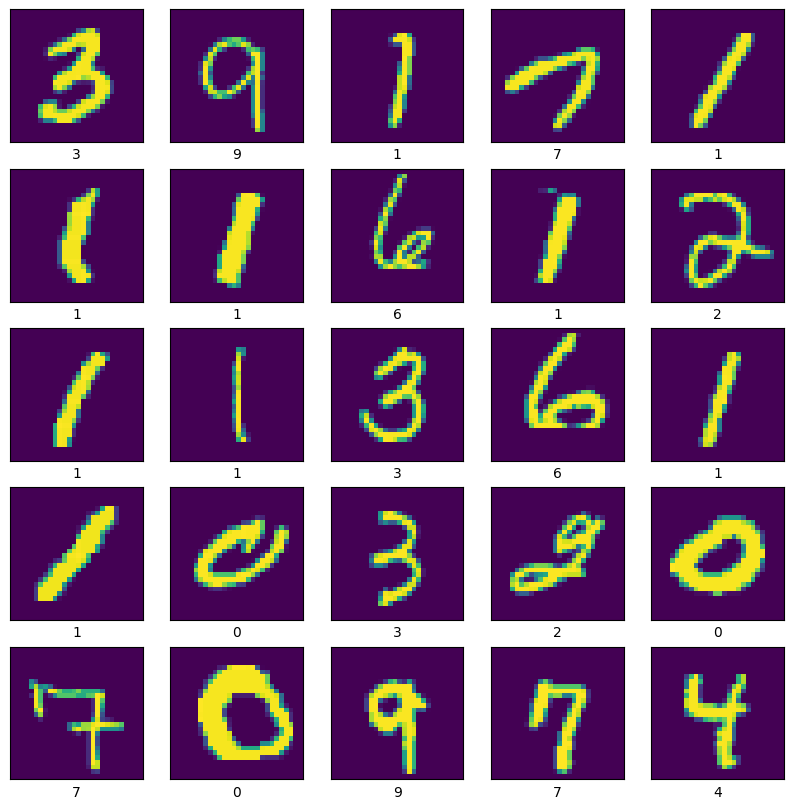

In [6]:
ra = np.random.randint(0, 13440, size=25)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_latin[ra[i]])
    integer_labels = np.argmax(Y_train_latin, axis=1)
    plt.xlabel(str(integer_labels[ra[i]]))
plt.show()

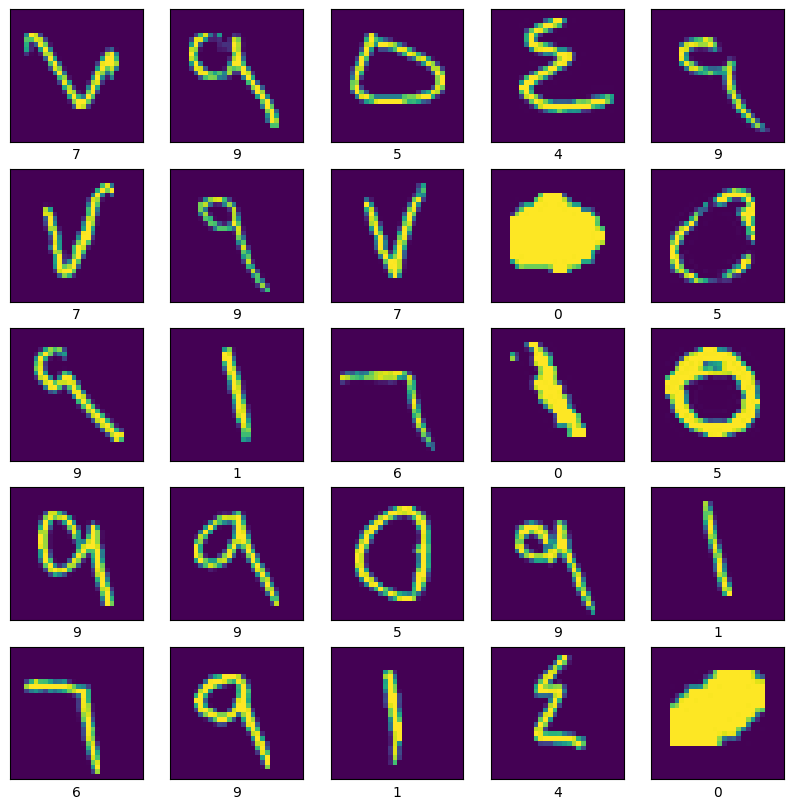

In [7]:
ra = np.random.randint(0, 13440, size=25)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_arab[ra[i]])
    integer_labels = np.argmax(y_train_arab, axis=1)
    plt.xlabel(str(integer_labels[ra[i]]))
plt.show()

In [8]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3), strides=(1,1),
          padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [9]:
# Create an EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=25, restore_best_weights=True)

In [10]:
history=model.fit(X_train, Y_train, batch_size=128,
                  epochs=200, validation_data=(X_test, Y_test), callbacks=[early_stopping])

Epoch 1/200
938/938 [==============================] - 9s 5ms/step - loss: 0.3383 - accuracy: 0.8994 - val_loss: 0.1219 - val_accuracy: 0.9622
Epoch 2/200
938/938 [==============================] - 5s 5ms/step - loss: 0.1522 - accuracy: 0.9548 - val_loss: 0.0825 - val_accuracy: 0.9741
Epoch 3/200
938/938 [==============================] - 4s 5ms/step - loss: 0.1115 - accuracy: 0.9658 - val_loss: 0.0765 - val_accuracy: 0.9773
Epoch 4/200
938/938 [==============================] - 4s 5ms/step - loss: 0.0945 - accuracy: 0.9709 - val_loss: 0.0670 - val_accuracy: 0.9790
Epoch 5/200
938/938 [==============================] - 5s 5ms/step - loss: 0.0806 - accuracy: 0.9750 - val_loss: 0.0640 - val_accuracy: 0.9800
Epoch 6/200
938/938 [==============================] - 4s 5ms/step - loss: 0.0707 - accuracy: 0.9774 - val_loss: 0.0636 - val_accuracy: 0.9811
Epoch 7/200
938/938 [==============================] - 4s 5ms/step - loss: 0.0646 - accuracy: 0.9792 - val_loss: 0.0627 - val_accuracy: 0.9818

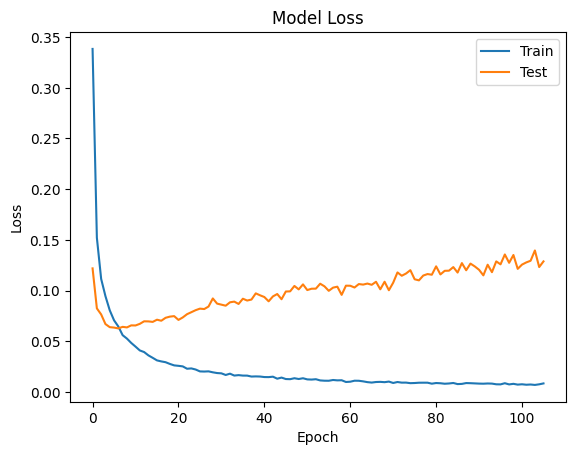

In [24]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

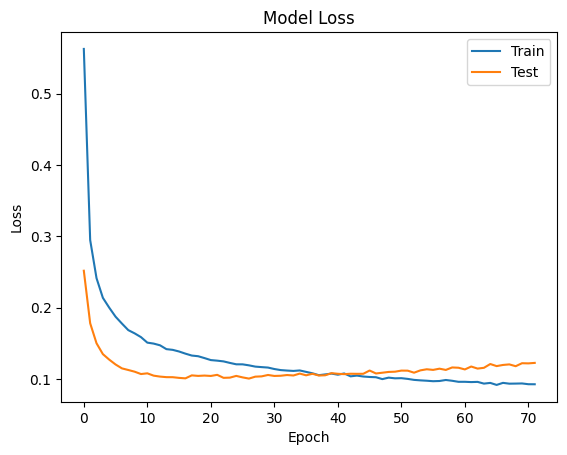

In [25]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [11]:
test_scores = model.evaluate(x_test_arab, y_test_arab, verbose=2)
loss_cnn = test_scores[0]*100
accuracy_cnn =  test_scores[1]*100
print('Test loss:', loss_cnn)
print('Test accuracy:', accuracy_cnn)

313/313 - 1s - loss: 0.1313 - accuracy: 0.9857 - 729ms/epoch - 2ms/step
Test loss: 13.129249215126038
Test accuracy: 98.56985807418823


In [12]:
test_scores = model.evaluate(X_test_latin, Y_test_latin, verbose=2)
loss_cnn = test_scores[0]*100
accuracy_cnn =  test_scores[1]*100
print('Test loss:', loss_cnn)
print('Test accuracy:', accuracy_cnn)

313/313 - 1s - loss: 0.1166 - accuracy: 0.9837 - 694ms/epoch - 2ms/step
Test loss: 11.65778711438179
Test accuracy: 98.36999773979187


# CNN Confusion Matrix

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



313/313 [==============================] - 1s 2ms/step


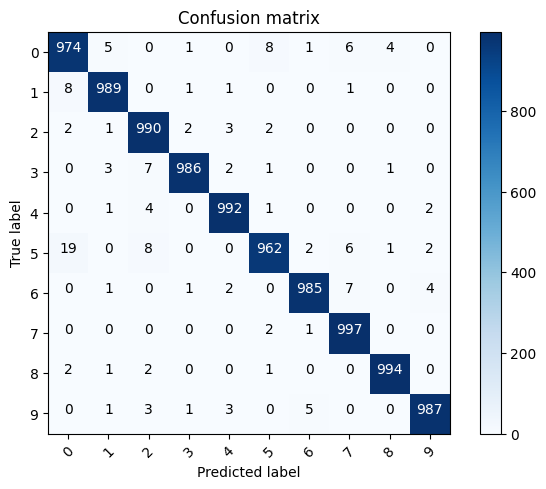

In [14]:
# Predict the values from the validation dataset
Y_pred = model.predict(x_test_arab)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test_arab,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

313/313 [==============================] - 1s 2ms/step


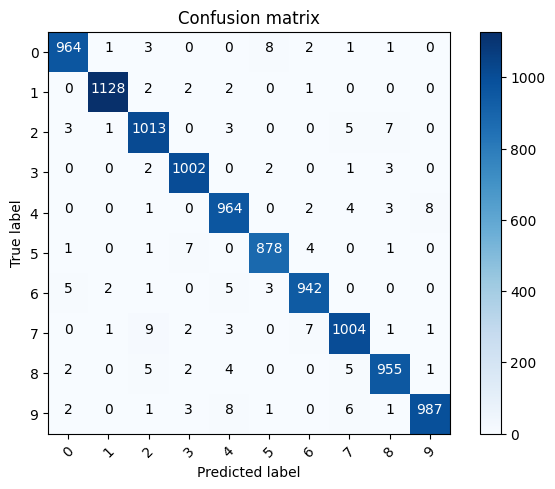

In [15]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_test_latin)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test_latin,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

In [16]:
model1 = Sequential()
model1.add(tf.keras.layers.InputLayer(input_shape=(28, 28, 1)))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(10, activation='softmax'))


model1.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [17]:
history1=model1.fit(X_train, Y_train, batch_size=128,
                  epochs=200, validation_data=(X_test, Y_test), callbacks=[early_stopping])

Epoch 1/200
938/938 [==============================] - 6s 5ms/step - loss: 0.5626 - accuracy: 0.8363 - val_loss: 0.2518 - val_accuracy: 0.9278
Epoch 2/200
938/938 [==============================] - 3s 3ms/step - loss: 0.2948 - accuracy: 0.9158 - val_loss: 0.1782 - val_accuracy: 0.9479
Epoch 3/200
938/938 [==============================] - 3s 4ms/step - loss: 0.2414 - accuracy: 0.9300 - val_loss: 0.1502 - val_accuracy: 0.9566
Epoch 4/200
938/938 [==============================] - 4s 4ms/step - loss: 0.2138 - accuracy: 0.9378 - val_loss: 0.1350 - val_accuracy: 0.9603
Epoch 5/200
938/938 [==============================] - 4s 4ms/step - loss: 0.2000 - accuracy: 0.9414 - val_loss: 0.1272 - val_accuracy: 0.9619
Epoch 6/200
938/938 [==============================] - 3s 3ms/step - loss: 0.1874 - accuracy: 0.9442 - val_loss: 0.1204 - val_accuracy: 0.9647
Epoch 7/200
938/938 [==============================] - 3s 4ms/step - loss: 0.1778 - accuracy: 0.9470 - val_loss: 0.1150 - val_accuracy: 0.9667

In [18]:
test_scores = model1.evaluate(x_test_arab, y_test_arab, verbose=2)
loss_cnn = test_scores[0]*100
accuracy_cnn =  test_scores[1]*100
print('Test loss:', loss_cnn)
print('Test accuracy:', accuracy_cnn)

313/313 - 1s - loss: 0.1020 - accuracy: 0.9787 - 789ms/epoch - 3ms/step
Test loss: 10.204818099737167
Test accuracy: 97.86978960037231


In [19]:
test_scores = model1.evaluate(X_test_latin, Y_test_latin, verbose=2)
loss_cnn = test_scores[0]*100
accuracy_cnn =  test_scores[1]*100
print('Test loss:', loss_cnn)
print('Test accuracy:', accuracy_cnn)

313/313 - 1s - loss: 0.1137 - accuracy: 0.9708 - 633ms/epoch - 2ms/step
Test loss: 11.365700513124466
Test accuracy: 97.079998254776


313/313 [==============================] - 1s 2ms/step


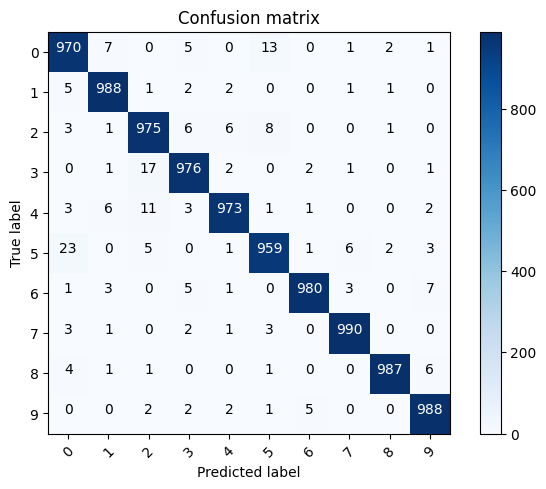

In [20]:
# Predict the values from the validation dataset
Y_pred = model1.predict(x_test_arab)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test_arab,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

313/313 [==============================] - 1s 2ms/step


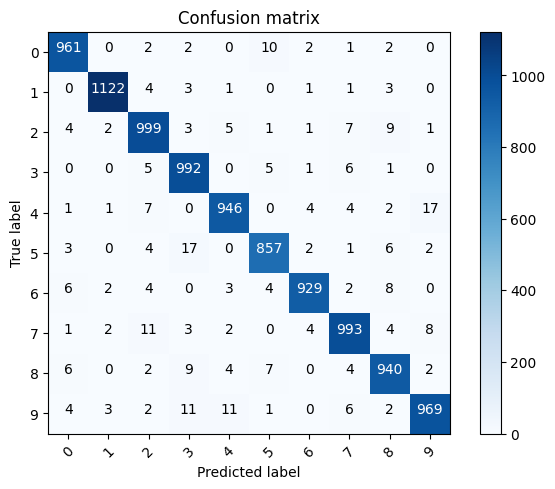

In [21]:
# Predict the values from the validation dataset
Y_pred = model1.predict(X_test_latin)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test_latin,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

In [22]:
model.save('CNNmodel.h5')
model1.save('ANNmodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
